In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [37]:
# loading our dataframes
#we will be using df_m for our sample of math class studetns and df_p for our sameple of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [38]:
#Let's figure out what do we have in our dataframes 

#First let's see what is the shappe of each dataframe 

print("Math Class:", df_m.shape)
print("Portugees class:", df_p.shape)

Math Class: (395, 33)
Portugees class: (649, 33)


In [39]:
#how we can see we have more students rows in one of our classes
#let's see if we have the same type of columns since their cuanitiy is simlar 

print("Columns of Math Class:", df_m.columns)
print("Columns of Port Class:", df_m.columns)

Columns of Math Class: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns of Port Class: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [40]:
#Since we can confirm that we have identical columns, let's see if we are missing any data 
df_m.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [41]:

df_p.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [42]:
#good news! no data is missing, let's try to get our basic stat info from dataframes 
print("Math Class:", df_m.describe()) 

print("Port Class:", df_p.describe())

Math Class:               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.8966

In [43]:
#since our thesis is "Compare romantic relationships in correlation to student performance."
#first we need to figure out how many studetns in relatiosnhip in each class and what is their current status 

print("Relationship status of Math class sutdetns:", df_m.value_counts("romantic"))

print("         ")

print("Relationship status of Port. class sutdetns:", df_p.value_counts("romantic"))

Relationship status of Math class sutdetns: romantic
no     263
yes    132
Name: count, dtype: int64
         
Relationship status of Port. class sutdetns: romantic
no     410
yes    239
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of relationship status in Math class')

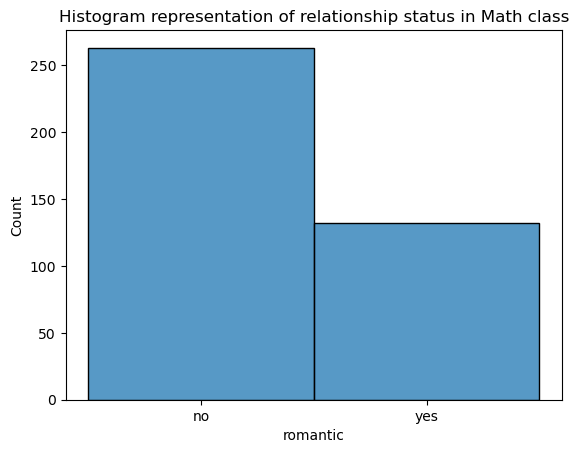

In [44]:

sns.histplot(data = df_m, x = "romantic") 
plt.title('Histogram representation of relationship status in Math class')

Text(0.5, 1.0, 'Histogram representation of relationship status in Port class')

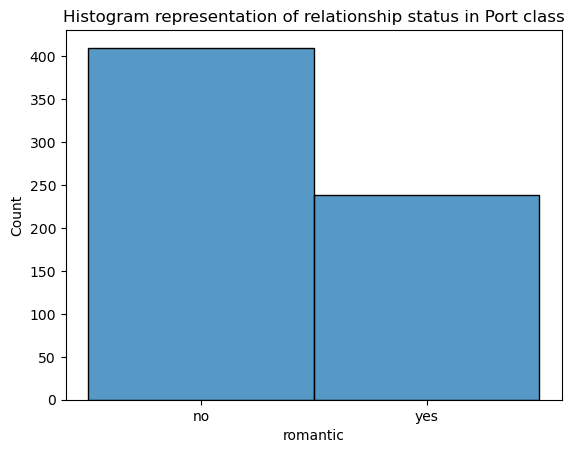

In [45]:
sns.histplot(data = df_p, x = "romantic") 
plt.title('Histogram representation of relationship status in Port class')

Sex differences in Math Class: sex
F    208
M    187
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of sex identity in Math class')

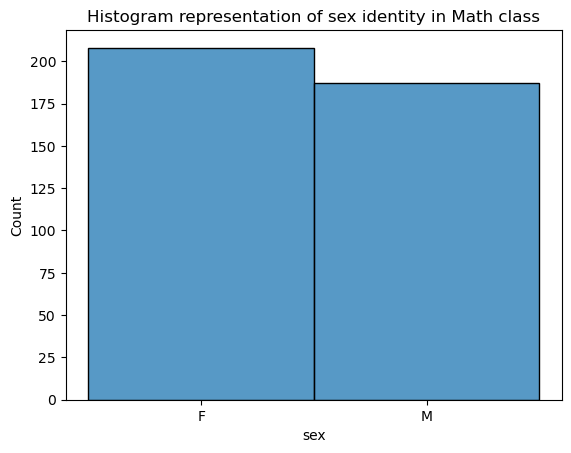

In [46]:
#now let's see the breakdown of gender differences in each classes 

print("Sex differences in Math Class:", df_m.value_counts("sex"))
sns.histplot(data = df_m, x = "sex") 
plt.title('Histogram representation of sex identity in Math class')

Sex differences in Port Class: sex
F    383
M    266
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram representation of sex identity in Port class')

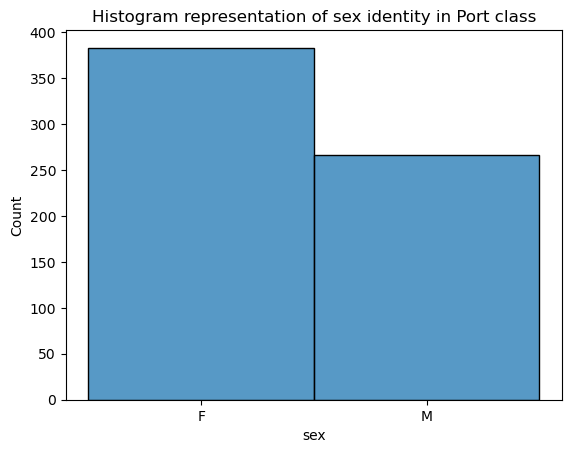

In [47]:

print("Sex differences in Port Class:", df_p.value_counts("sex"))
sns.histplot(data = df_p, x = "sex") 
plt.title('Histogram representation of sex identity in Port class')

In [48]:
#let's sort our variables based on gender and relathionship status 
#first we need to create new section just with our variables 

romance_sex_m = df_m.groupby(['sex', 'romantic']).size()
romance_sex_p = df_p.groupby(['sex', 'romantic']).size()
print("Sex of students and their relationsip status for Math class:", romance_sex_m)
print("   ")
print("Sex of students and their relationsip status for Port class:", romance_sex_p)

Sex of students and their relationsip status for Math class: sex  romantic
F    no          129
     yes          79
M    no          134
     yes          53
dtype: int64
   
Sex of students and their relationsip status for Port class: sex  romantic
F    no          225
     yes         158
M    no          185
     yes          81
dtype: int64


In [62]:
#now let's see the summarization of grades for all three semesters
#this info will be useful to us bit later 
sum_grades_m = df_m['G1'] + df_m['G2'] + df_m['G3']
print("Cummulative grades for Math class studetns:", sum_grades_m) 
print(" ")
sum_grades_p = df_p['G1'] + df_p['G2'] + df_p['G3']
print("Cummulative grades for Port class studetns:", sum_grades_p) 

Cummulative grades for Math class studetns: 0      12
1      11
2      18
3      29
4      20
       ..
390    18
391    32
392    15
393    22
394    18
Length: 395, dtype: int64
 
Cummulative grades for Port class studetns: 0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Length: 649, dtype: int64


<Axes: ylabel='Count'>

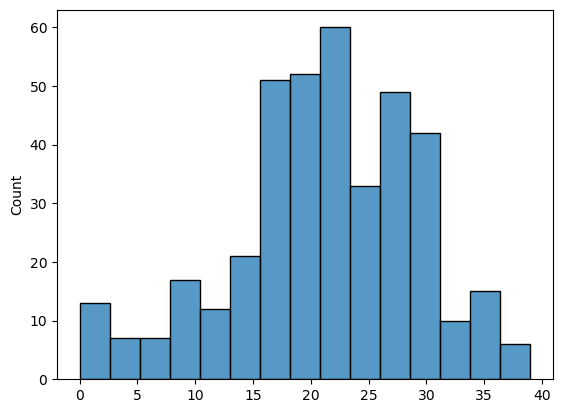

In [63]:
#visual observation of the cummulative grades 
sns.histplot(sum_grades_m)

<Axes: ylabel='Count'>

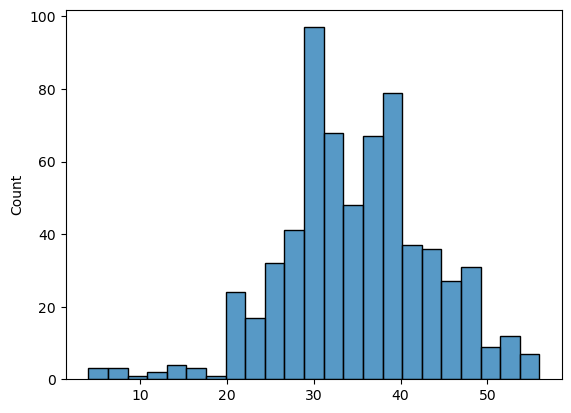

In [64]:
sns.histplot(sum_grades_p)

Boxplot visualization of Math Class studdetns: Axes(0.125,0.11;0.775x0.77)


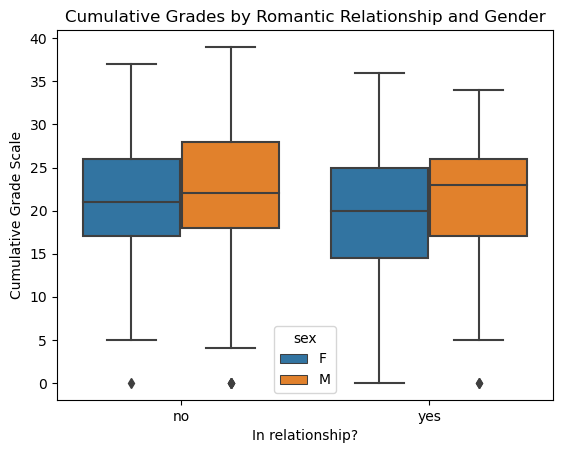

In [65]:
#let's get visualization on relationship between our numerical varaible (Cumulative grades scale) and categorical variables (Sex identity and Reltationship status)
boxplot_m = sns.boxplot(data=df_m, x= 'romantic', y=sum_grades_m, hue='sex')
plt.xlabel('In relationship?')
plt.ylabel('Cumulative Grade Scale')
plt.title('Cumulative Grades by Romantic Relationship and Gender')
print("Boxplot visualization of Math Class studdetns:", boxplot_m)

Boxplot visualization of Port Class studdetns: Axes(0.125,0.11;0.775x0.77)


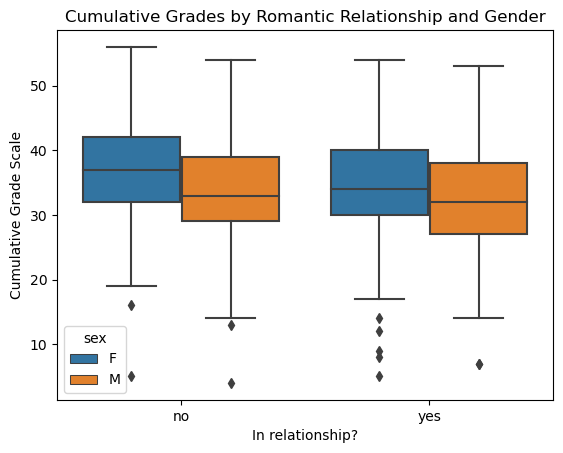

In [53]:
boxplot_p = sns.boxplot(data=df_p, x= 'romantic', y=sum_grades_p, hue='sex')
plt.xlabel('In relationship?')
plt.ylabel('Cumulative Grade Scale')
plt.title('Cumulative Grades by Romantic Relationship and Gender')
print("Boxplot visualization of Port Class studdetns:", boxplot_p)

In [131]:
#visualtization on failures and our categorical variables 
#first createa a section 

failure_total_m = df_m['failures'].value_counts()
print("Math Class Failure total:", failure_total_m)
print("   ")
failure_total_p = df_p['failures'].value_counts()
print("Math Class Failure total:", failure_total_p)

Math Class Failure total: failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64
   
Math Class Failure total: failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64
